# Análise Exploratória de Dados: Dataset de Filmes Netflix

### Introdução e Objetivo do Projeto

Este notebook documenta a Análise Exploratória de Dados (EDA) realizada sobre um dataset contendo informações de mais de 9.000 filmes. O objetivo principal é extrair insights a partir das features disponíveis, como gênero, popularidade, contagem de votos e data de lançamento.

A análise visa responder a questões de negócio específicas que podem auxiliar na tomada de decisão estratégica da empresa, como a otimização de investimentos em produção de conteúdo e a compreensão das preferências do público.

---
### Escopo da Análise e Questões de Negócio

A investigação será guiada pelas seguintes questões centrais:

1.  **Distribuição de Gêneros:** Identificar a frequência de cada gênero no dataset para compreender a composição do catálogo e as categorias predominantes.

2.  **Engajamento por Gênero:** Analisar a contagem total de votos (`Vote_Count`) por gênero para determinar quais categorias geram maior volume de interação do público.

3.  **Análise de Popularidade Máxima:** Isolar o filme com a maior métrica de popularidade e identificar seu gênero associado, a fim de reconhecer os atributos de produções de maior sucesso.

4.  **Análise de Popularidade Mínima:** Identificar o filme com o menor índice de popularidade e seu gênero, para analisar possíveis outliers negativos ou conteúdos de nicho com menor alcance.

5.  **Tendência de Produção Anual:** Determinar o ano com o maior volume de filmes lançados para identificar picos históricos de produção na indústria cinematográfica.

O pipeline a seguir inclui as etapas de carregamento, pré-processamento, limpeza dos dados e, finalmente, a visualização dos resultados para responder a estas questões.

In [1]:
# Importa as bibliotecas necessárias para análise e visualização.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o dataset do arquivo CSV para um DataFrame.
df = pd.read_csv('Data/mymoviedb.csv', lineterminator='\n')

# Exibe as 5 primeiras linhas do DataFrame.
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [2]:
# Exibe um resumo conciso do DataFrame.
# Isso inclui o tipo de cada coluna, a contagem de valores não-nulos e o uso de memória.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [3]:
# Conta o número total de linhas duplicadas no DataFrame.
df.duplicated().sum()

0

In [4]:
# Gera um resumo estatístico para as colunas numéricas do DataFrame.
# Isso inclui contagem, média, desvio padrão, quartis, mínimo e máximo.
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


## Planejamento da Análise e Preparação dos Dados

Com base na exploração inicial, o seguinte plano de ação foi definido para preparar os dados antes de responder às questões de negócio:

1.  **Tratamento da Coluna de Data (`Release_Date`):** A coluna será convertida do tipo `object` (texto) para `datetime`. Esta etapa é essencial para permitir a extração correta do ano de lançamento de cada filme.

2.  **Seleção de Features (Colunas):** As colunas `Overview`, `Original_Language` e `Poster_Url` serão removidas, pois não são relevantes para responder às perguntas definidas no escopo deste projeto. A remoção otimiza o DataFrame para a análise.

3.  **Categorização da Média de Votos (`Vote_Average`):** A coluna, que é numérica e contínua, será transformada em uma coluna categórica com faixas de avaliação (ex: 'Popular', 'Average'). Esta técnica, conhecida como *binning*, simplifica a análise de performance.

4.  **Tratamento da Coluna de Gênero (`Genre`):** Esta é a etapa de preparação mais complexa. A coluna `Genre` contém múltiplos gêneros em uma única string. O processo será:
    * Separar a string em uma lista de gêneros (usando `.split()`).
    * Transformar o DataFrame para que cada gênero ocupe sua própria linha (usando `.explode()`). Este passo é fundamental para a contagem e agrupamento corretos dos gêneros.

In [5]:
# Converte a coluna 'Release_Date' de texto (object) para o formato de data (datetime).
# Isso é necessário para realizar operações com datas, como extrair o ano.
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

# Imprime o novo tipo de dado da coluna para confirmar que a conversão foi bem-sucedida.
print(df['Release_Date'].dtypes)

datetime64[ns]


In [6]:
# Acessa as propriedades de data (.dt) da coluna e extrai apenas o ano (.year).
# A coluna 'Release_Date', que antes continha a data completa, agora conterá apenas o ano como um número.
df['Release_Date'] = df['Release_Date'].dt.year

# Exibe o conteúdo da coluna para verificar se a transformação foi bem-sucedida.
# Em um notebook, esta linha mostrará as primeiras e últimas linhas da coluna.
df['Release_Date']

0       2021
1       2022
2       2022
3       2021
4       2021
        ... 
9822    1973
9823    2020
9824    2016
9825    2021
9826    1984
Name: Release_Date, Length: 9827, dtype: int32

## Exclusão de Colunas (Feature Selection)

Nesta etapa, removeremos as colunas que não são relevantes para responder às questões de negócio deste projeto. A remoção de features desnecessárias é uma boa prática que simplifica o DataFrame, otimiza o uso de memória e foca a análise nos dados que realmente importam.

As colunas a serem removidas são: `Overview`, `Original_Language` e `Poster_Url`.

In [7]:
# Cria uma lista contendo os nomes das colunas que serão removidas.
cols = ['Overview', 'Original_Language', 'Poster_Url']

# Remove as colunas especificadas do DataFrame.
# 'axis=1' informa que estamos removendo colunas (e não linhas).
# 'inplace=True' aplica a mudança diretamente no DataFrame 'df'.
df.drop(cols, axis=1, inplace=True)

# Exibe o DataFrame atualizado para verificar se as colunas foram removidas.
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,7.6,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,3.5,Horror
9824,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


## Categorização da Coluna 'Vote_Average'

Nesta etapa, a coluna numérica e contínua `Vote_Average` será convertida em uma coluna categórica. Este processo, conhecido como *binning* (ou discretização), agrupa os valores em faixas, o que simplifica a análise e a criação de visualizações.

Para esta tarefa, serão criadas quatro categorias distintas baseadas nos quartis da distribuição dos dados: `popular`, `average`, `below_avg` e `not_popular`. A transformação será executada utilizando a função `categorize_col()`.

In [8]:
# Define a função que categoriza uma coluna numérica em 4 grupos (quartis).
def categorize_col(df, col, labels):
    # Cria os 5 limites (bordas) para os 4 grupos usando os valores de mínimo, máximo e quartis.
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    # Usa a função pd.cut para aplicar as categorias baseadas nos limites e rótulos.
    # include_lowest=True garante que o menor valor seja incluído na primeira categoria.
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop', include_lowest=True)
    
    # Retorna o DataFrame modificado.
    return df

# Cria a lista de rótulos (nomes) para as novas categorias.
labels = ['not_popular', 'below_avg', 'average', 'popular']

# Executa a função na coluna 'Vote_Average', aplicando a categorização.
categorize_col(df, 'Vote_Average', labels)

# Exibe os valores únicos da coluna 'Vote_Average' para verificar se
# a transformação foi bem-sucedida e as categorias foram criadas.
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [9]:
# Conta a quantidade de filmes em cada uma das categorias criadas para 'Vote_Average'.
# Isso mostra a distribuição dos filmes entre as faixas de avaliação ('popular', 'average', etc.).
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2567
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [10]:
# Remove todas as linhas que contêm qualquer valor nulo (NaN).
# O parâmetro 'inplace=True' aplica a alteração diretamente no DataFrame.
df.dropna(inplace=True)

# Verifica novamente a soma de valores nulos por coluna.
# Isso é feito para confirmar que a remoção foi bem-sucedida.
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

## Tratamento e Transformação da Coluna 'Genre'

Esta é a etapa de preparação mais importante para a análise. A coluna `Genre` contém múltiplos gêneros em uma única string (ex: "Action, Adventure, Comedy"), o que impede a contagem ou agrupamento individual.

O processo será dividido em duas etapas principais:
1.  **Split:** A string de cada linha será "quebrada" em uma lista de gêneros.
2.  **Explode:** O DataFrame será "explodido", de forma que cada gênero na lista criada ocupe sua própria linha, duplicando as outras informações do filme.

In [11]:
# 1. Separa a string da coluna 'Genre' em uma lista de gêneros, usando ', ' como separador.
df['Genre'] = df['Genre'].str.split(', ')

# 2. Transforma o DataFrame: cria uma nova linha para cada gênero na lista e reseta o índice.
df = df.explode('Genre').reset_index(drop=True)

# 3. Exibe as 5 primeiras linhas para verificar a nova estrutura do DataFrame.
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [12]:
# Converte o tipo de dado da coluna 'Genre' para 'category'.
# Esta é uma otimização de performance e uso de memória.
df['Genre'] = df['Genre'].astype('category')

# Exibe o novo tipo de dado da coluna para confirmar a conversão.
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [13]:
# Conta a quantidade de valores únicos para cada coluna do DataFrame.
# É útil para ter um resumo final dos dados após toda a limpeza e preparação.
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

## Visualização de Dados e Respostas às Questões de Negócio

Com os dados devidamente limpos e pré-processados, esta seção foca na criação de visualizações para responder às questões de negócio definidas no início do projeto.

Utilizaremos as bibliotecas `Seaborn` e `Matplotlib` para gerar gráficos que nos ajudem a interpretar os padrões e as tendências nos dados de forma clara e objetiva.

As análises visuais a seguir abordarão:
* **Questão 1:** A distribuição dos gêneros de filmes.
* **Questão 2:** A contagem de votos agregada por gênero.
* **Questão 3 & 4:** A identificação dos filmes nos extremos de popularidade.
* **Questão 5:** A frequência de filmes lançados por ano.

In [14]:
# Define o estilo estético para todos os gráficos que serão criados a seguir.
# 'whitegrid' aplica um fundo branco com linhas de grade cinzas, facilitando a leitura.
sns.set_style('whitegrid')

## 1. Qual o Gênero de Filme Mais Frequente?

Para responder à primeira questão de negócio, utilizaremos o método `.describe()` diretamente na coluna `Genre`. 

Como esta coluna foi convertida para o tipo `category`, o `.describe()` gera um resumo estatístico específico para dados categóricos, que inclui:
* `count`: Contagem total de itens.
* `unique`: Número de categorias únicas.
* `top`: A categoria mais comum (a moda).
* `freq`: A frequência (contagem) em que a categoria mais comum aparece.

Portanto, o valor no campo `top` nos dará diretamente a resposta para a pergunta.

In [15]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

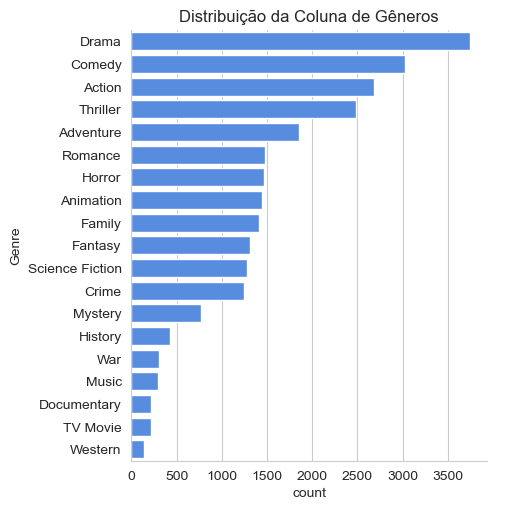

In [16]:
# Cria um gráfico de barras horizontal para visualizar a contagem de cada gênero.
# 'kind="count"' instrui o Seaborn a contar as ocorrências de cada item no eixo y.
sns.catplot(y='Genre', 
            data=df, 
            kind='count',
            # Ordena as barras da mais frequente para a menos frequente.
            order=df['Genre'].value_counts().index,
            # Define a cor das barras.
            color='#4287f5')

# Adiciona um título ao gráfico (com a ortografia corrigida).
plt.title('Distribuição da Coluna de Gêneros')

# Exibe o gráfico na tela.
plt.show()

### Conclusão da Análise - Questão 1

Confirmando a tendência observada no gráfico de distribuição, a análise numérica com o método `.describe()` permite responder com precisão à primeira questão de negócio.

* **Insight Principal:** O gênero **Drama** é, com uma margem significativa, a categoria de filme mais frequente no dataset.

* **Dados de Suporte:**
    * **Gênero Mais Comum (`top`):** `Drama`
    * **Frequência (`freq`):** 3.744 ocorrências
    * **Total de Gêneros Únicos (`unique`):** 19

**Implicação para o Negócio:**

A predominância do gênero Drama reforça sua posição como um pilar central na estratégia de conteúdo da plataforma. Isso pode indicar uma demanda consistente do público ou uma estratégia de aquisição focada em um gênero de apelo amplo. Para a tomada de decisão, isso sugere que investimentos contínuos em dramas de alta qualidade são uma estratégia de baixo risco, enquanto a análise dos gêneros na "cauda longa" do gráfico pode revelar oportunidades em nichos de mercado ainda não saturados.

## 2. Distribuição das Categorias de Avaliação (`Vote_Average`)

Nesta etapa, o foco da análise é a coluna `Vote_Average`, que foi previamente transformada em categorias (`popular`, `average`, `below_avg`, `not_popular`) baseadas nos quartis da sua distribuição.

O objetivo aqui é visualizar a contagem de filmes em cada uma dessas quatro categorias. Isso nos permitirá entender como o catálogo de filmes está distribuído em termos de avaliação: há um equilíbrio entre filmes com notas altas, médias e baixas, ou alguma categoria se sobressai?

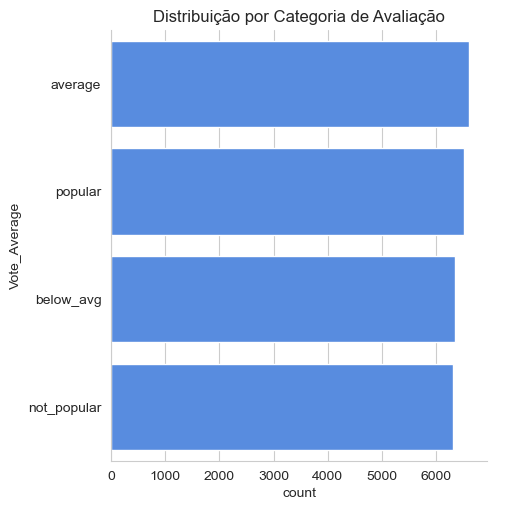

In [17]:

# Cria um gráfico de barras para contar quantos filmes existem em cada categoria de 'Vote_Average'.
sns.catplot(y='Vote_Average', 
            data=df, 
            kind='count',
            # Ordena as barras da categoria mais frequente para a menos frequente.
            order=df['Vote_Average'].value_counts().index,
            # Define a cor das barras.
            color='#4287f5')

# Adiciona um título ao gráfico.
plt.title('Distribuição por Categoria de Avaliação')

# Exibe o gráfico.
plt.show()

### Insight da Análise - Distribuição das Avaliações

O gráfico de contagem revela uma distribuição **extremamente equilibrada** entre as quatro categorias de avaliação. Cada grupo (`popular`, `average`, `below_avg`, `not_popular`) contém um número muito similar de filmes.

**Este é um resultado esperado e confirma a eficácia do nosso método de preparação de dados.**

As categorias foram criadas utilizando os quartis (os pontos de 25%, 50% e 75% da distribuição de notas), que, por definição, dividem o conjunto de dados em quatro partes de tamanhos aproximadamente iguais. As pequenas variações nas contagens são normais e ocorrem devido à forma como a função `pd.cut` lida com valores que caem exatamente nos limites dos quartis.

**Implicação:** A principal conclusão desta visualização não é sobre o catálogo da Netflix em si, mas sim uma **validação da nossa etapa de engenharia de features**. Ela confirma que a categorização da coluna `Vote_Average` foi bem-sucedida e que agora possuímos quatro grupos balanceados, prontos para futuras análises comparativas.

## 3. Qual Filme Possui a Maior Popularidade?

Nesta análise, o objetivo é identificar o filme com a maior pontuação de popularidade (`Popularity`) em todo o dataset. Esta métrica é um indicador chave do "buzz" e do alcance de um filme na plataforma, refletindo o quão comentado e assistido ele é.

A análise consistirá em localizar a linha do DataFrame que corresponde ao valor máximo da coluna `Popularity` para, em seguida, extrair as informações de `Title` e `Genre` deste filme específico.

In [18]:
# Este comando localiza o filme mais popular usando um filtro booleano.

# 1. Primeiro, `df['Popularity'].max()` encontra o maior valor na coluna 'Popularity'.
# 2. Em seguida, `df['Popularity'] == ...` cria uma condição (Verdadeiro/Falso) para cada linha.
# 3. Finalmente, o DataFrame `df` é filtrado, retornando apenas a linha onde a condição é Verdadeira.
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### Conclusão - Filme de Maior Popularidade

A consulta para encontrar o filme com a pontuação máxima de popularidade retornou o seguinte resultado.

*Observação: O resultado exibe três linhas para o mesmo filme, pois nosso DataFrame foi formatado para ter uma linha para cada gênero individual.*

* **Insight Principal:** O filme com a maior pontuação de popularidade no dataset é **`Spider-Man: No Way Home`**.

* **Dados de Suporte:**
    * **Pontuação de Popularidade (`max`):** 5083.954
    * **Gêneros Associados:** `Action`, `Adventure`, `Science Fiction`

**Implicação para o Negócio:**

O fato de um filme de uma franquia de super-heróis de grande apelo global ocupar o topo da popularidade de forma tão expressiva é um forte indicador do tipo de conteúdo "blockbuster" que gera o maior engajamento. Isso reforça a validade de investimentos em grandes produções, especialmente aquelas ligadas a universos cinematográficos já estabelecidos e com uma base de fãs consolidada. A combinação dos gêneros Ação, Aventura e Ficção Científica prova ser uma fórmula de extremo sucesso para o público da plataforma.

## 4. Qual Filme Possui a Menor Popularidade?

Em contraste com a análise anterior, agora o foco é identificar o filme com a **menor** pontuação de popularidade (`Popularity`).

Analisar o extremo inferior do espectro de popularidade é útil para identificar conteúdos com baixo engajamento, produções de nicho ou possíveis outliers negativos no dataset. A análise consistirá em localizar a linha do DataFrame que corresponde ao valor **mínimo** da coluna `Popularity` e extrair as informações de `Title` e `Genre` deste filme.

In [19]:
# Este comando localiza o filme menos popular, usando a mesma lógica de filtro booleano anterior.

# 1. Primeiro, `df['Popularity'].min()` encontra o menor valor na coluna 'Popularity'.
# 2. Em seguida, o DataFrame é filtrado para retornar apenas a(s) linha(s) onde a 'Popularity'
#    é igual a esse valor mínimo encontrado.
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


### Conclusão - Filmes de Menor Popularidade

A análise para identificar o filme com a menor pontuação de popularidade revelou um resultado inesperado: dois filmes diferentes compartilham exatamente o mesmo valor mínimo.

* **Insight Principal:** Foram encontrados dois filmes empatados com a menor pontuação de popularidade no dataset: **`The United States vs. Billie Holiday`** (2021) e **`Threads`** (1984).

* **Dados de Suporte:**
    * **Pontuação de Popularidade (`min`):** `13.354`
    * **Gêneros Associados:** `Music`, `Drama`, `History` (para o primeiro filme) e `War`, `Drama`, `Science Fiction` (para o segundo).

**Implicação para o Negócio:**

O fato de dois filmes tão distintos—um drama biográfico recente e um filme de guerra/ficção científica mais antigo—compartilharem a mesma pontuação mínima sugere que a baixa popularidade não está restrita a um único tipo ou era de conteúdo. Isso pode indicar um "piso" de popularidade no dataset para filmes de nicho ou com baixo engajamento.

Essa informação é útil para a estratégia de conteúdo: em vez de simplesmente evitar um gênero específico, a decisão de remover ou tentar promover um título de baixa performance deve considerar outros fatores, como custo de licenciamento, relevância cultural ou o potencial de redescoberta por um público específico.

## 5. Qual Ano Teve o Maior Número de Filmes Lançados?

Para a última questão de negócio, vamos analisar a distribuição de lançamentos de filmes ao longo do tempo. O objetivo é identificar o ano com o maior volume de produção cinematográfica, com base nos dados disponíveis em nosso dataset.

Esta análise nos ajudará a entender os picos de atividade na indústria ou os períodos de maior aquisição de conteúdo para a plataforma. A abordagem consistirá em contar a frequência de cada ano na coluna `Release_Date` para encontrar a moda (o ano mais comum).

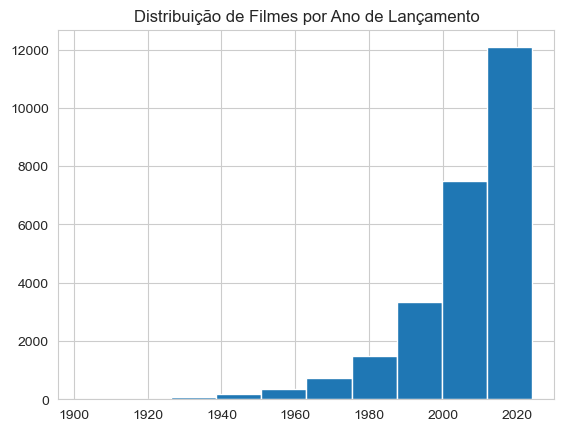

In [20]:
# Cria um histograma simples diretamente da coluna 'Release_Date' para visualizar a distribuição.
df['Release_Date'].hist()

# Define o título do gráfico (com a ortografia corrigida).
plt.title('Distribuição de Filmes por Ano de Lançamento')

# Exibe o gráfico gerado na tela.
plt.show()

### Insight da Análise - Tendência de Lançamentos

A visualização do histograma nos oferece uma clara perspectiva sobre a tendência histórica da produção de filmes presentes no dataset.

* **Insight Principal:** O gráfico demonstra um **crescimento exponencial** no número de filmes lançados ao longo do tempo. A atividade, que era mínima até a metade do século XX, começa a acelerar a partir dos anos 80 e atinge seu pico máximo na década de **2010-2020**.

* **Observação Adicional:** A barra correspondente à década de 2020 é menor, o que é esperado, pois representa apenas os primeiros anos desta década (o dataset não inclui a década completa).

**Implicação para o Negócio:**

A esmagadora maioria do conteúdo disponível para análise foi produzida nas últimas duas a três décadas. Isso reforça a importância de focar em tendências de gêneros e popularidade de filmes mais recentes, pois eles representam o maior volume do catálogo e, provavelmente, o maior interesse do público atual. A "cauda longa" de filmes mais antigos, embora presente, é quantitativamente menos significativa.

# Conclusão Geral da Análise

Esta análise exploratória de dados sobre o dataset de filmes da Netflix cumpriu seu objetivo de responder a questões de negócio chave através da limpeza, transformação e visualização dos dados. As etapas de preparação garantiram a integridade dos dados, e a análise subsequente revelou padrões claros sobre o catálogo de filmes.

---
### Resumo dos Principais Insights Encontrados:

1.  **Gênero Predominante:** O gênero **`Drama`** é o mais representado no catálogo, aparecendo em 3.744 filmes. Isso indica sua importância como pilar central na estratégia de conteúdo da plataforma.

2.  **Distribuição das Avaliações:** A distribuição de filmes entre as categorias de avaliação (`popular`, `average`, etc.) se mostrou **equilibrada**. Este é um resultado esperado e positivo, pois valida a metodologia de engenharia de features (binning por quartis) e mostra que o catálogo possui uma variedade de filmes em todas as faixas de avaliação.

3.  **Pico de Popularidade:** O filme **`Spider-Man: No Way Home`** se destaca como o mais popular, confirmando o imenso poder de engajamento de grandes franquias de super-heróis e blockbusters globais.

4.  **Menor Popularidade:** Dois filmes distintos, **`The United States vs. Billie Holiday`** (2021) e **`Threads`** (1984), compartilham a menor pontuação de popularidade. Isso sugere que o baixo engajamento não é restrito a um único tipo ou era de conteúdo, afetando tanto produções recentes de nicho quanto títulos mais antigos.

5.  **Tendência de Produção:** A produção de filmes teve um **crescimento exponencial** ao longo das décadas, com um pico acentuado no período de **2010-2020**. Isso demonstra que o catálogo é majoritariamente composto por conteúdo recente.

### Implicação Estratégica Consolidada

A estratégia de conteúdo mais eficaz, com base nesta análise, parece ser um modelo híbrido: manter um alto volume de produção e aquisição no gênero **Drama** como uma base sólida e de apelo amplo, enquanto se realiza investimentos estratégicos de alto valor em **blockbusters de franquias estabelecidas** para impulsionar picos de popularidade e engajamento. O foco da plataforma em conteúdo produzido nas últimas duas décadas é evidente e deve guiar futuras análises de tendências.

Este projeto serviu como um excelente exercício prático de todo o pipeline de análise de dados, desde a limpeza e preparação até a geração de insights acionáveis.